**  We will start by exploring the  the Titanic data we have**, and display a sample from the data to:
    1- Check and audit the data we have.
    2- State the questions that we will be interested in answering them
  


In [18]:
import pandas as pd
#Read the dataset from the CSV file into a DataFrame
df= pd.read_csv('titanic_data.csv')
#Display sample of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


** Before starting analyse the data**, we will check the data completness in order to detect any missing data

In [19]:
def check_missing_data_from_column(column, total_count):
    column_count= column.count()
    return total_count - column_count ==0

In [20]:
# Counting all the clolumns data to make sure that the data is complete and there is no missing values
pass_id_count= df['PassengerId'].count()
# We will consider the "PassengerId" column is the complete column
print "Survived column is complete: %r" %check_missing_data_from_column(df['Survived'],pass_id_count)
print "Pclass column is complete: %r" %check_missing_data_from_column(df['Pclass'],pass_id_count)
print "Name column is complete: %r" %check_missing_data_from_column(df['Name'],pass_id_count)
print "Sex column is complete: %r" %check_missing_data_from_column(df['Sex'],pass_id_count)
print "Age column is complete: %r" %check_missing_data_from_column(df['Age'],pass_id_count)
print "SibSp column is complete: %r" %check_missing_data_from_column(df['SibSp'],pass_id_count)
print "Parch column is complete: %r" %check_missing_data_from_column(df['Parch'],pass_id_count)
print "Ticket column  is complete: %r" %check_missing_data_from_column(df['Ticket'],pass_id_count)
print "Fare column is complete: %r" %check_missing_data_from_column(df['Fare'],pass_id_count)
print "Cabin column is complete: %r" %check_missing_data_from_column(df['Cabin'],pass_id_count)
print "Embarked column is complete: %r" %check_missing_data_from_column(df['Embarked'],pass_id_count)

Survived column is complete: True
Pclass column is complete: True
Name column is complete: True
Sex column is complete: True
Age column is complete: False
SibSp column is complete: True
Parch column is complete: True
Ticket column  is complete: True
Fare column is complete: True
Cabin column is complete: False
Embarked column is complete: False


** From the above Summary**, we can find that "Age, Cabin and Embarked columns" ar not completed, so, we will need to handle this missing data, for me I think I will not use the cabin nor Embarked values, so I will only handle missing"Age" columns when needed.

**For a dataset like what we have**, I think we will be interested in answering the following question:
   - **How many** survived Vs not-survived persons.?, and what is the percentages of each state.?
   - **How many** males Vs femlales aboard the Titanic.?, and what is the survival rate of each gender.?
   - **What is the correltions** factors between the data set columns.?
   - **Did the Age of a passenger** have any correlation to his /her Surviving status.?
   - **Did the Sex of a passenger** have any correlation to his /her Surviving state.?
   - **Did having relatives "siblings, spouses, children, or parents** had an effect on the survival state of a prson.? 

** Now It's time to have some shallow insights from the completed columns of data we have**, I will move directly to the very first question I personally need to know the answer about:
  - How many survived and not-survived people from the Titanic.?, and what's their percentage.?
And also for more insghts we may show:
  - How many males and Females were aboard the Titanic.?

Populating the interactive namespace from numpy and matplotlib
Survived count: 342 , with percentage ~ 38 %, while, Not-Survived count: 549 ,with percentage ~61 %


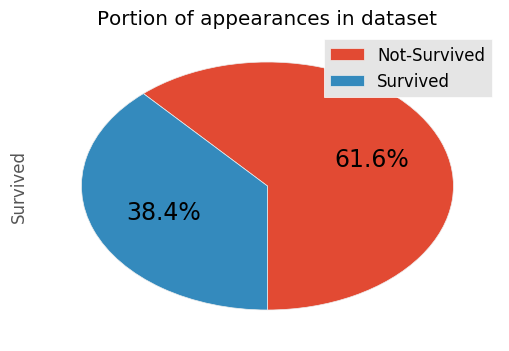

In [21]:
%pylab inline
import matplotlib
matplotlib.style.use('ggplot')
# Survival statistics
survived_count = df['Survived'].sum()
survived_perc= df['Survived'].mean()
not_surv_count=df['Survived'].count()-survived_count
not_surv_perc=1-survived_perc
print "Survived count: %d , with percentage ~ %d %%, while, Not-Survived count: %d ,with percentage ~%d %%" % (survived_count,\
survived_perc*100, not_surv_count, not_surv_perc*100)
#Draw a Pie-Chart for the survival statistics
df.Survived.value_counts().plot(kind='pie',labels=['','','',''],autopct='%1.1f%%', startangle=270, fontsize=17)
plt.title('Portion of appearances in dataset')
plt.legend(['Not-Survived','Survived'])


** From the stats** and chart above we can clearly observe that:
    - The bigger portion of the passengers in the dataset we have were not lucky enough to survive the Titanic.

male      577
female    314
Name: Sex, dtype: int64


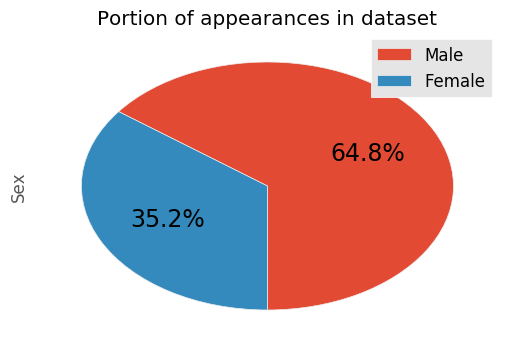

In [9]:
# Number of males and Females aboard the Titanic
print df['Sex'].value_counts()
#Draw a Pie-Chart for the Sex statistics
df.Sex.value_counts().plot(kind='pie',labels=['','','',''],autopct='%1.1f%%', startangle=270, fontsize=17)
plt.title('Portion of appearances in dataset')
plt.legend(['Male','Female'])

**From the above statistics and chart**, we can observe that we have number of males about double the number of females in our data set aboard the Titanic,
** We will go deeper** in our investigation about the Sex and Survival rates later.

** But , now and before answering any definite questions**, we may try to draw a correlation table based on **"Pearsons" method**, showing the correlation factors between different columns, but first we will discard the rows with missing values of Age.

In [22]:
#Removing rows with no age from the dataset
df_with_age=df[df.Age>0]
df.corr(method='pearson',min_periods=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


** Since we mostly care about the surviving status of the passengers**, we can find from the above correlation table that there is:
    - **Medium Correlation** between Survived state and Pclass and subsequently, there is also **Medium Correlation** between Survivd and Fare.
    - Surprisingly, The corrlation table shows **Low linear correlation** between Age, siblings/spouses count, parent/ child count and Survived state on the other side, which means that the increasing in age has low correlation with being 
    survived.

**So, now we will start asking deeper questions**, like did the passenger age has tended to affect the passenger survival from the Titanic.?, note that we will work on passengers rows with age exists **"defined above".**
- For Answering ths above question in a meaningfull way, we will divide the passengers into age-groups according to their ages values, in order to compare the survival rate among different age-groups.

In [23]:
#Adding Age-Group column
age_groups=[]
for row in df_with_age['Age']:
    if row >= 65:
            age_groups.append('Senior')
    elif row >=25:
           age_groups.append('Adult')
    elif row >=15:
            age_groups.append('Youth')
    elif row >=0:
            age_groups.append('Child')
    else:
            age_groups.append('NA')
# df_with_age.loc['Age_group']=age_groups
df_with_age.insert(5, 'Age_group', age_groups)
df_with_age.head()


,PassengerId,Survived,Pclass,Name,Sex,Age_group,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Youth,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,Adult,35.0,0,0,373450,8.0500,NaN,S


** Let's display some statistics** for each age_group and their portions:

Number of Childs aboard the Titanic 78
Number of Youth aboard the Titanic 200
Number of Adults aboard the Titanic 425
Number of Seniors aboard the Titanic 11


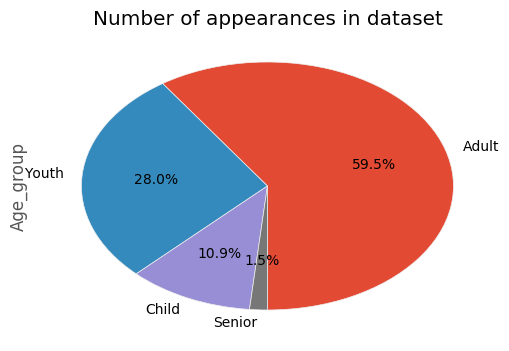

In [24]:
print "Number of Childs aboard the Titanic %d" %df_with_age['Age_group'][df_with_age.Age_group=='Child'].count()
print "Number of Youth aboard the Titanic %d" %df_with_age['Age_group'][df_with_age.Age_group=='Youth'].count()
print "Number of Adults aboard the Titanic %d" %df_with_age['Age_group'][df_with_age.Age_group=='Adult'].count()
print "Number of Seniors aboard the Titanic %d" %df_with_age['Age_group'][df_with_age.Age_group=='Senior'].count()
#Displaying Age_grroups portions using Pie-chart

df_with_age.Age_group.value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=270, fontsize=10)

plt.title('Number of appearances in dataset')

**From the above stats and chart** , we will observe that in our data set:
    - The biggest portion went for the **Adults** between 25 and 65" years old.
    - The second biggest portion went for the **Youth** between 15 and 25 years old.
    - We have no many **Seniors** "older than 65 years old".

** Now since we have grouped the passengers** into age-groups, it's time to answer the question of:
    - What was the survival rate of each age-group in our dataset.?

In [25]:
def survival_column_state(df):
    column=df['Survived']
    count=column.count()
    survived= column[df.Survived>0].count()
    not_survived= column[df.Survived==0].count()
    survival_perc= (survived*100)/ count
    print "Count = %d , Survived= %d, Not-survived= %d, With surival rate= %d %% \n" %(count,survived,\
                                                                                        not_survived,survival_perc)

** Age Groups Statistics**

In [26]:
#Age Groups Statistics
df_childs=df_with_age[df_with_age.Age_group=='Child']
print "Children Statistics: "
survival_column_state(df_childs)
print "Youth Statistics: "
df_youth=df_with_age[df_with_age.Age_group=='Youth']
survival_column_state(df_youth)
print "Adults Statistics:"
df_adults=df_with_age[df_with_age.Age_group=='Adult']
survival_column_state(df_adults)
print "Seniors Statistics: "
df_seniors=df_with_age[df_with_age.Age_group=='Senior']
survival_column_state(df_seniors)

Children Statistics: 
Count = 78 , Survived= 45, Not-survived= 33, With surival rate= 57 % 

Youth Statistics: 
Count = 200 , Survived= 73, Not-survived= 127, With surival rate= 36 % 

Adults Statistics:
Count = 425 , Survived= 171, Not-survived= 254, With surival rate= 40 % 

Seniors Statistics: 
Count = 11 , Survived= 1, Not-survived= 10, With surival rate= 9 % 



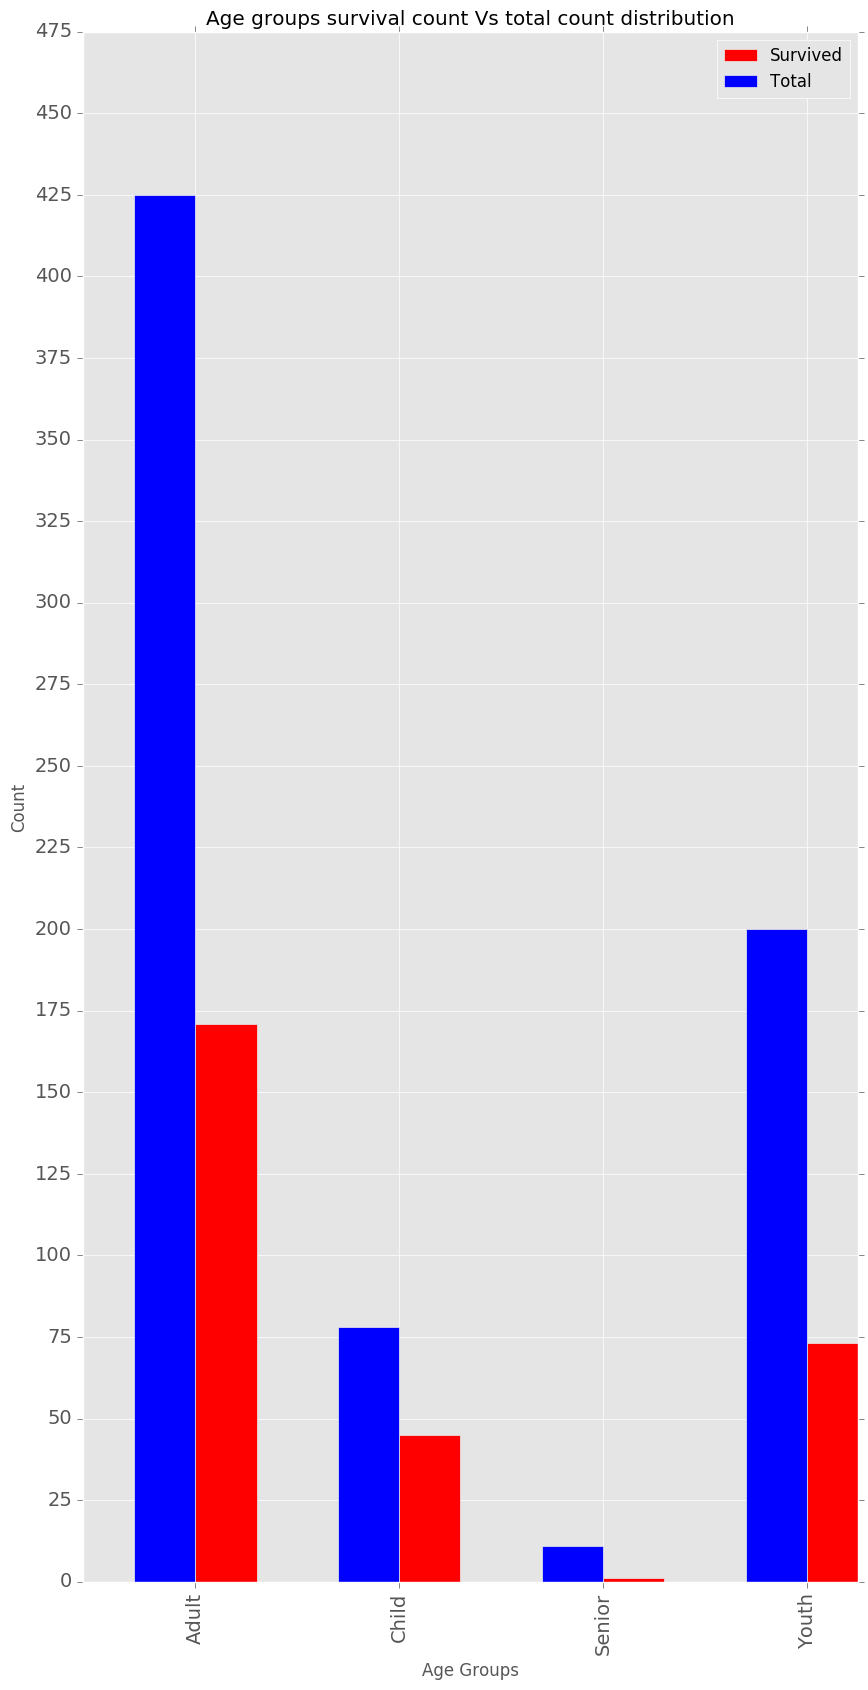

In [27]:
fig, ax = subplots()

df_sub=df_with_age.groupby(['Age_group'])['Survived'].sum()
bar_plot_survived=df_sub.plot(kind='bar',width=0.3,legend=True,figsize =(10,20),stacked=False,title="Age groups survival count Vs total count distribution",color='red',position=0,fontsize=14,yticks=(np.arange(0, 500, 25)))


df_sub_count=df_with_age.groupby(['Age_group'])['Survived'].count()
bar_plot_count=df_sub_count.plot(kind='bar',width=0.3,title="Age groups survival count Vs total count distribution",figsize =(10,20),color='blue',stacked=False,legend=True,position=1,fontsize=14,yticks=(np.arange(0, 500, 25)))
ax.legend(['Survived','Total'])
ax.set_xlabel("Age Groups")
ax.set_ylabel("Count")

plt.show()

**From the above stats and chart**, we can clearly observe that:
    - Children had the best chancses to survive among all the age-groups in our data set.
    - However they had the buggest portion, but Adults came in the second place in the survival rate.
    - Seniors in our data set were not so lucky to survive the Titanic, they had the least survival rate among our age-groups.

**So, above** we did investigate the passengers ages and survival rates based on their age-group, now we will move to another factor to analyze, we will now have a deeper look on "Sex" distribution and the passengers survibal rates based on their Sex.

**Let's show** the 'Sex' statistics aboard the Titanic
  - We will start with displaying info about each Sex count and their Survival rate.
  - We will plot a bar chart showing the Survival count Vs Total count for each Sex

In [28]:
df_males=df[df.Sex=='male']
print "Males Statistics: "
survival_column_state(df_males)

df_females=df[df.Sex=='female']
print "Females Statistics: "
survival_column_state(df_females)

Males Statistics: 
Count = 577 , Survived= 109, Not-survived= 468, With surival rate= 18 % 

Females Statistics: 
Count = 314 , Survived= 233, Not-survived= 81, With surival rate= 74 % 



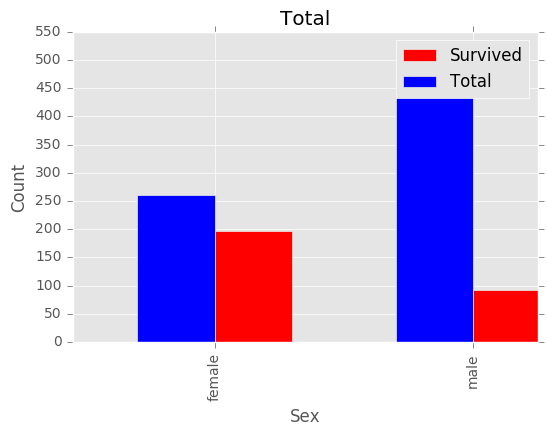

In [29]:
fig, ax = subplots()
width=50
df_sub=df_with_age.groupby(['Sex'])['Survived'].sum()
bar_plot_survived=df_sub.plot(kind='bar',width=0.3,title="Survived",ax=ax,stacked=True,legend=True,color='red',position=0,yticks=(np.arange(0, 600, 50)))

df_sub_count=df_with_age.groupby(['Sex'])['Survived'].count()
bar_plot_count=df_sub_count.plot(kind='bar',width=0.3,title="Total",ax=ax,stacked=True,color='blue',legend=True,position=1,yticks=(np.arange(0, 600, 50)))

ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.legend(['Survived','Total'])
plt.show()


**From the above stats and graph**, we can easily observe that in our data set:
    - However the number of females are less than the males, the survival rate is much much higher in the females than tاe 
    males.   

** We will dig deeper ** to investigate the correlation between "Sex & Age group" on the first side Vs. Survival rates on the other side

Child Sex distribution and survival based on Sex:
Male= 39, with Percentage 50 %, Survived: 21, Not-Survived: 18, with Survival rate: 53 % 
Female = 39,    with Percentage 50 %,Survived: 24, Not-Survived: 15, with Survival rate: 61 %
Youth Sex distribution and survival based on Sex:
Male= 122, with Percentage 61 %, Survived: 12, Not-Survived: 110, with Survival rate: 9 % 
Female = 78,    with Percentage 39 %,Survived: 61, Not-Survived: 17, with Survival rate: 50 %
Adults Sex distribution and survival based on Sex:
Male= 281, with Percentage 66 %, Survived: 59, Not-Survived: 222, with Survival rate: 20 % 
Female = 144,    with Percentage 33 %,Survived: 112, Not-Survived: 32, with Survival rate: 39 %
Seniors Sex distribution and survival based on Sex:
Male= 11, with Percentage 100 %, Survived: 1, Not-Survived: 10, with Survival rate: 9 % 
Female = 0,    with Percentage 0 %,Survived: 0, Not-Survived: 0, with Survival rate: 0 %


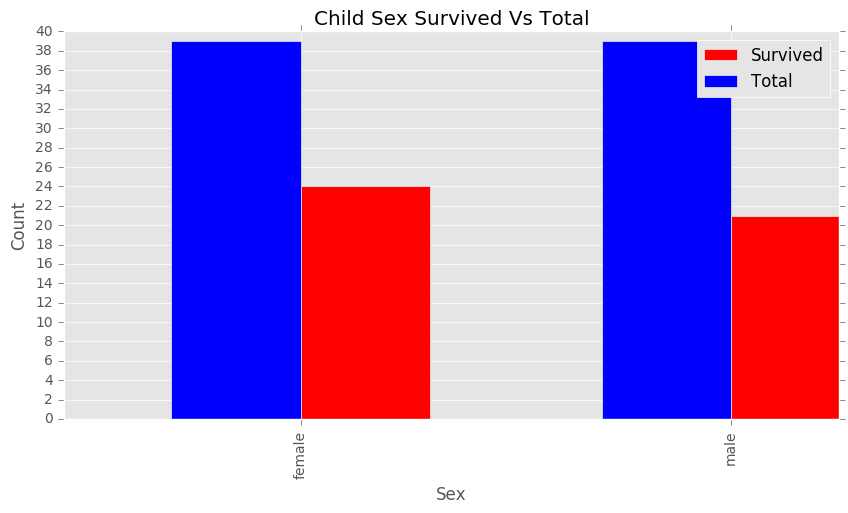

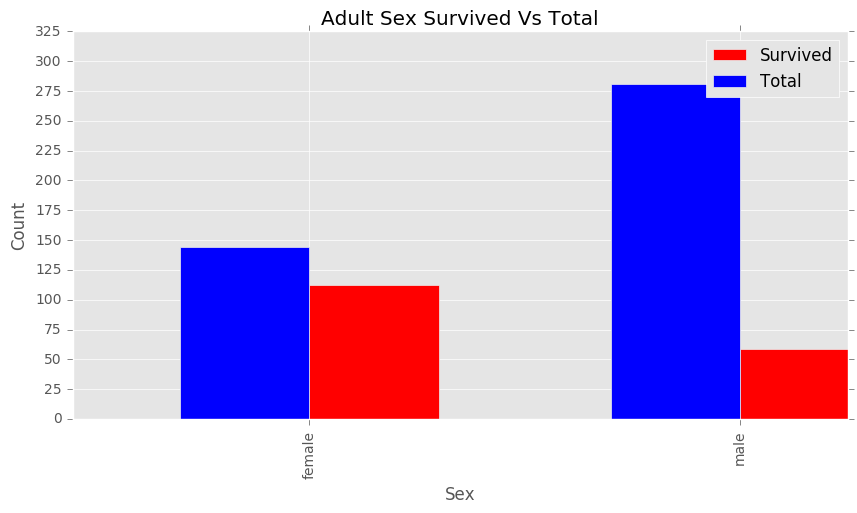

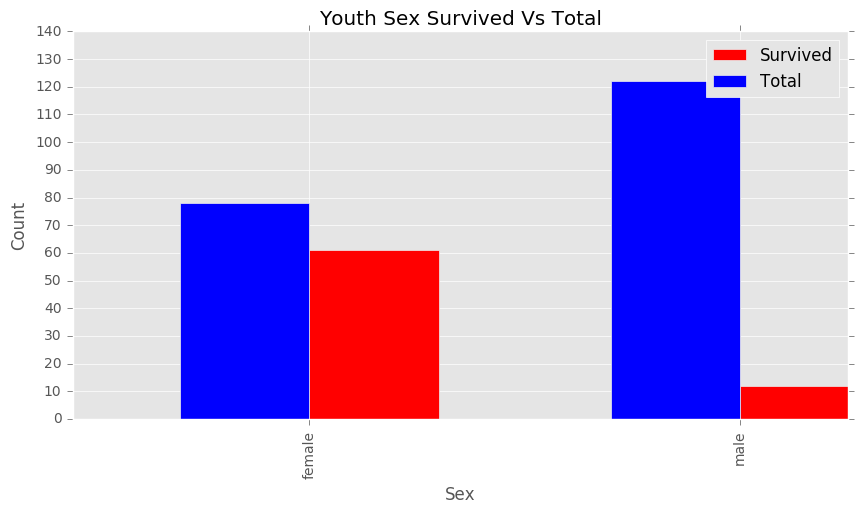

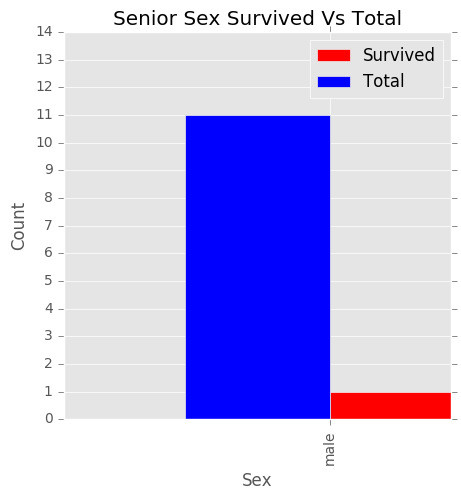

In [30]:
def describe_survival_state_by_sex(grp_df):
    #This method takes a column as an input and displays the "male" , "female" counts and also the survived, 
    #and not survived count and rate for each Sex.
    try:
        male_count=grp_df.get_group('male')['Survived'].count()
        male_survived_count= grp_df.get_group('male')['Survived'].sum()
        male_not_survived_count= male_count - male_survived_count
        male_survived_perc= male_survived_count * 100 / male_count
    except:
            male_count=0
            male_survived_count= 0
            male_not_survived_count= 0
            male_survived_perc= 0
       
    try:
        female_count=grp_df.get_group('female')['Survived'].count()
        female_survived_count=grp_df.get_group('female')['Survived'].sum()
        female_not_survived_count= female_count - female_survived_count
        female_survived_perc= female_survived_count * 100 / male_count
    except:
        female_count=0
        female_survived_count=0
        female_not_survived_count= 0
        female_survived_perc= 0
    
    male_perc=(male_count*100)/ (male_count+female_count)
    female_perc=(female_count*100)/ (male_count+female_count)
    print 'Male= %d, with Percentage %d %%, Survived: %d, Not-Survived: %d, with Survival rate: %d %% \nFemale = %d,\
    with Percentage %d %%,Survived: %d, Not-Survived: %d, with Survival rate: %d %%'%(male_count, male_perc,male_survived_count,male_not_survived_count,\
                                                                                      male_survived_perc,female_count, female_perc,female_survived_count,\
                                                                                      female_not_survived_count,female_survived_perc)

#Show Info
df_grp_childs=df_childs.groupby(['Sex'])
df_childs_sub=df_grp_childs['Survived'].sum()
df_childs_sub_count=df_grp_childs['Survived'].count()

df_grp_youth=df_youth.groupby(['Sex'])
df_youth_sub=df_grp_youth['Survived'].sum()
df_youth_sub_count=df_grp_youth['Survived'].count()

df_grp_adults=df_adults.groupby(['Sex'])
df_adults_sub=df_grp_adults['Survived'].sum()
df_adults_sub_count=df_grp_adults['Survived'].count()

df_grp_seniors=df_seniors.groupby(['Sex'])
df_seniors_sub=df_grp_seniors['Survived'].sum()
df_seniors_sub_count=df_grp_seniors['Survived'].count()

print 'Child Sex distribution and survival based on Sex:'
describe_survival_state_by_sex(df_grp_childs)
print 'Youth Sex distribution and survival based on Sex:'
describe_survival_state_by_sex(df_grp_youth)
print 'Adults Sex distribution and survival based on Sex:'
describe_survival_state_by_sex(df_grp_adults)
print 'Seniors Sex distribution and survival based on Sex:'
describe_survival_state_by_sex(df_grp_seniors)
fig, ax = subplots()
width=50
bar_plot_children_survived=df_childs_sub.plot(kind='bar',width=0.3,figsize =(10,5),ax=ax,position=0,title="Child Sex Survived Vs Total",stacked=True,legend=True,color='red',yticks=(np.arange(0, 42, 2)))
bar_plot_children_count=df_childs_sub_count.plot(kind='bar',width=0.3,ax=ax,position=1,figsize =(10,5),title="Child Sex Survived Vs Total",stacked=True,legend=True,color='blue',yticks=(np.arange(0, 42, 2)))

ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.legend(['Survived','Total'])
plt.show()

fig, ax = subplots()
width=50
bar_plot_adults_survived=df_adults_sub.plot(kind='bar',width=0.3,figsize =(10,5),ax=ax,position=0,title="Adult Sex Survived Vs Total",stacked=True,legend=True,color='red',yticks=(np.arange(0, 350, 25)))
bar_plot_adults_count=df_adults_sub_count.plot(kind='bar',width=0.3,ax=ax,position=1,figsize =(10,5),title="Adult Sex Survived Vs Total",stacked=True,legend=True,color='blue',yticks=(np.arange(0, 350, 25)))
ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.legend(['Survived','Total'])
plt.show()

fig, ax = subplots()
width=50
bar_plot_youth_survived=df_youth_sub.plot(kind='bar',width=0.3,figsize =(10,5),ax=ax,position=0,title="Youth Sex Survived Vs Total",stacked=True,legend=True,color='red',yticks=(np.arange(0, 150, 10)))
bar_plot_youth_count=df_youth_sub_count.plot(kind='bar',ax=ax,width=0.3,position=1,figsize =(10,5),title="Youth Sex Survived Vs Total",stacked=True,legend=True,color='blue',yticks=(np.arange(0, 150, 10)))
ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.legend(['Survived','Total'])
plt.show()

fig, ax = subplots()
width=50
bar_plot_seniors_survived=df_seniors_sub.plot(kind='bar',width=0.3,figsize =(5,5),ax=ax,position=0,title="Seniors Sex Survived Vs Total",stacked=True,legend=True,color='red',yticks=(np.arange(0, 15, 1)))
bar_plot_seniors_count=df_seniors_sub_count.plot(kind='bar',width=0.3,ax=ax,position=1,figsize =(5,5),title="Senior Sex Survived Vs Total",stacked=True,legend=True,color='blue',yticks=(np.arange(0, 15, 1)))
ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.legend(['Survived','Total'])
plt.show()


**From the above long stats and detailed graph**, We can find that:
    - In all the age-groups _Except Seniors_ the females in our data set had better chances in surviving the Titanic.
    - Inside the Seniors group we have no females, so, we cannot tell whether Senior females had better chances or not, but we    can tell that the males Seniors in our dataset had low chancess of being survived from the Titanic.
    - The female chances were at their top in the Youth age-group, with more than 5 times survival rate of males.

** After digging deeper** in the "Age and Sex" relations to the survival rate, ** Here we come** to the part of:
    - Did having relatives aboard the Titanic effect the survival rate of the people in our dataset.?
 
**In order to answer** this question perfectly, we will divide our analysis into two steps:
    - Did having more relatives aboard the Titanic lead to better chances of survival.?
    - Did have or have no relatived aboard the Titanic effect the survival.?
**We will discuss** this point by anaysing the survival rates according to the "parch" and "sibsp" columns.

** We will start** by studying the survival count of the passengers in our dataset with respect to their number of parents/ childs "parch" aboard the Titanic, and with respect to their Siblings/ spouses "sibsp" aboard the Titanic.

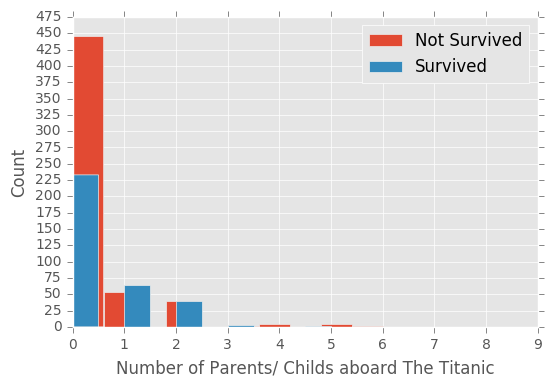

In [31]:
fig, ax = subplots()
#Drawing a bar plot showing the survived count Vs the not-survived count of passenegers for each "parch" value
df.groupby('Survived').plot(kind='hist',ax=ax,y='Parch',xticks=(np.arange(0, 10, 1)),yticks=(np.arange(0, 500, 25)))
ax.set_xlabel("Number of Parents/ Childs aboard The Titanic")
ax.set_ylabel("Count")
ax.legend(['Not Survived','Survived'])
plt.show()

**Initially** from the above graph we can find that:
    - The passengers in our dataset who have no parents/ childs aboard the titanic had better chances in surviving the Titanic. "We will make further analysis below"

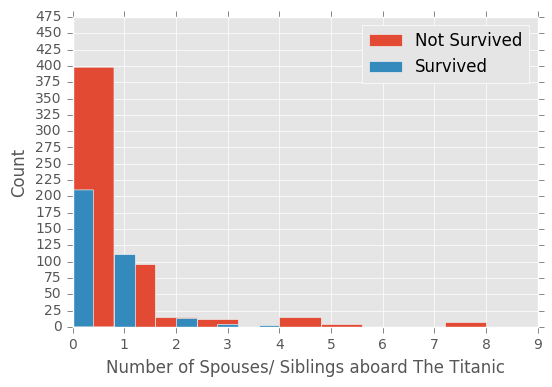

In [32]:
fig, ax = subplots()
#Drawing a bar plot showing the survived count Vs the not-survived count of passenegers for each "sibsp" value
df.groupby('Survived').plot(kind='hist',ax=ax,y='SibSp', xticks=(np.arange(0, 10, 1)),yticks=(np.arange(0, 500, 25)))
ax.set_xlabel("Number of Spouses/ Siblings aboard The Titanic")
ax.set_ylabel("Count")
ax.legend(['Not Survived','Survived'])
plt.show()

**Also** from the above graph we can find that:
    - The passengers in our dataset who have no siblings/ spouses aboard the titanic had better chances in surviving the Titanic. "We will make further analysis below"

** In order to focus more ** on the concept of whether having relatives aboard the Titanic tended to have an effect on the survival rates of the passengers, we will re-construct our analysis and simplify the question to be:
    - Did have or have no relatived aboard the Titanic effect the survival.?
**And, in order** to answer this question we will add two columns to the dataset which are:
    - "has_parch" which will have "Has_no" in case the passenger had no parents/childs aboard the Titanic, and "Has_one_or_more" if the passenger had one or more parents/childs aboard the Titanic.
    - "has_sipsb" which will have "Has_no" in case the passenger had no siblings/spouses aboard the Titanic, and "Has_one_or_more" if the passenger had one or more siblings/spouses aboard the Titanic.

Number of passengers who: 
 - Has Parents / Childs Aboard the Titanic= 213
 - Has no Parents / Childs Aboard the Titanic= 678
 - Has Siblings /Spouses aboard the Titanic= 283
 - Has No Siblings / Spouses aboard the Titanic=608
Survival Rate in case of:
 1- Has Parents / Childs aboard the Titanic= 51 % 
 2- Has no  Parents / Childs aboard the Titanic= 34 %
Survival Rate in case of:
 1- Has Siblings / Spouses aboard the Titanic= 46 % 
 2- Has no   Siblings / Spouses aboard the Titanic= 34 %


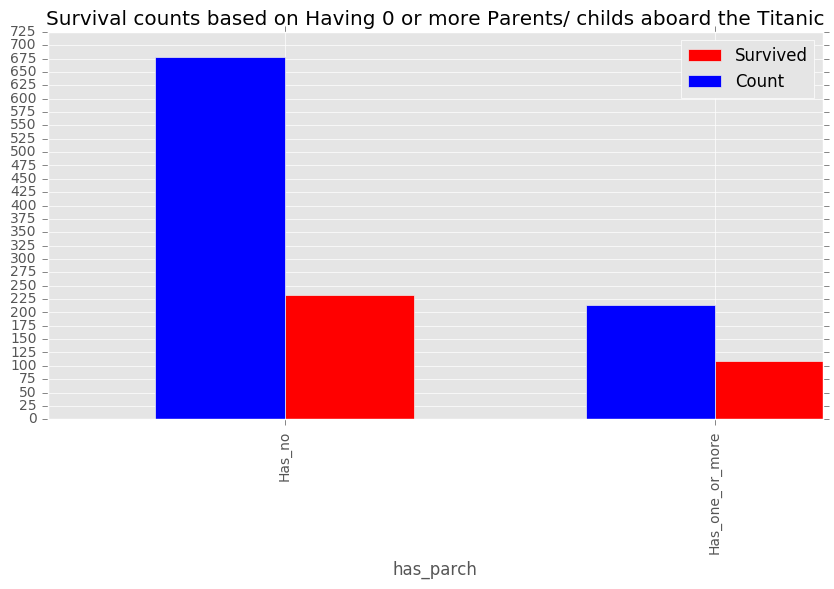

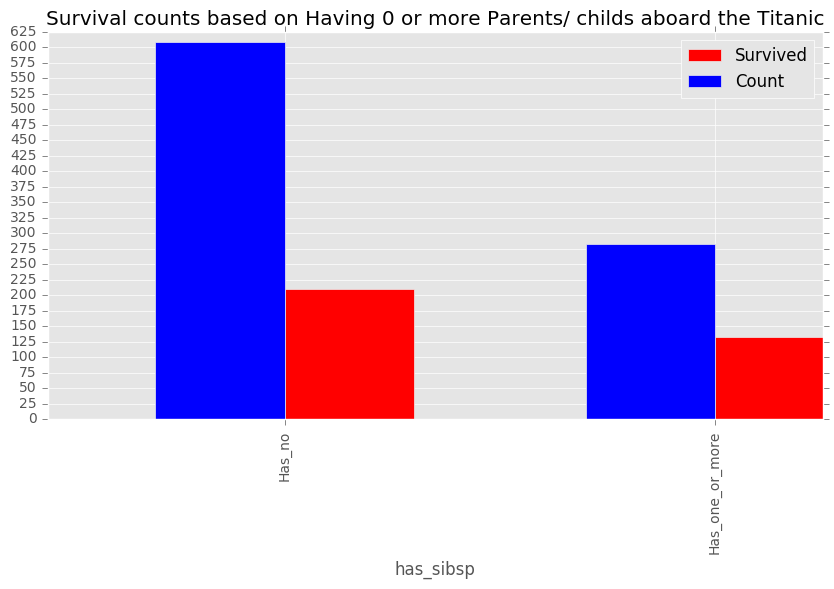

In [33]:
#Adding "has_sibsp" column will have "Has_no" in case the passenger had no siblings/spouses aboard the Titanic, 
#and "Has_one_or_more" if the passenger had one or more siblings/spouses aboard the Titanic.
sibsp=[]
for row in df['SibSp']:
    if row >0:
            sibsp.append('Has_one_or_more')
    else:
            sibsp.append('Has_no')
df['has_sibsp']=sibsp
df.head()
#Adding "has_parch" column which will have "0" in case the passenger had no parents/childs aboard the Titanic,
#and "1" if the passenger had one or more parents/childs aboard the Titanic.
parch=[]
for row in df['Parch']:
    if row >0:
            parch.append('Has_one_or_more')
    else:
            parch.append('Has_no')
df['has_parch']=parch
df.head()

# Show statistics based on the new added columns
has_parch_sum=df[df.has_parch=='Has_one_or_more']['Survived'].sum()
has_parch_count=df[df.has_parch=='Has_one_or_more']['Survived'].count()
has_no_parch_sum=df[df.has_parch=='Has_no']['Survived'].sum()
has_no_parch_count=df[df.has_parch=='Has_no']['Survived'].count()
parch_survival_perc= (has_parch_sum*100)/has_parch_count
no_parch_survival_perc= (has_no_parch_sum*100)/has_no_parch_count

has_sibsp_sum=df[df.has_sibsp=='Has_one_or_more']['Survived'].sum()
has_sibsp_count=df[df.has_sibsp=='Has_one_or_more']['Survived'].count()
has_no_sibsp_sum=df[df.has_sibsp=='Has_no']['Survived'].sum()
has_no_sibsp_count=df[df.has_sibsp=='Has_no']['Survived'].count()
sibsp_survival_perc= (has_sibsp_sum*100)/has_sibsp_count
no_sibsp_survival_perc= (has_no_sibsp_sum*100)/has_no_sibsp_count
print 'Number of passengers who: \n - Has Parents / Childs Aboard the Titanic= %d\n \
- Has no Parents / Childs Aboard the Titanic= %d\n - Has Siblings /Spouses aboard the Titanic= %d\n \
- Has No Siblings / Spouses aboard the Titanic=%d' %(has_parch_count,has_no_parch_count,has_sibsp_count,has_no_sibsp_count)
print 'Survival Rate in case of:\n 1- Has Parents / Childs aboard the Titanic= %d %% \n 2- Has\
 no  Parents / Childs aboard the Titanic= %d %%'%(parch_survival_perc,no_parch_survival_perc)
print 'Survival Rate in case of:\n 1- Has Siblings / Spouses aboard the Titanic= %d %% \n 2- Has\
 no   Siblings / Spouses aboard the Titanic= %d %%'%(sibsp_survival_perc,no_sibsp_survival_perc)

#Drawing graphs to show comparison between Survived counts Vs the total counts of passengers for each "parch" and"sibsp" values
fig, ax = subplots()
width=50
df_sub=df.groupby(['has_parch'])['Survived'].sum()
bar_plot_survived=df_sub.plot(kind='bar',figsize =(10,5),width=0.3,title="Survival counts based on Having 0 or more Parents/ childs aboard the Titanic",ax=ax,stacked=True,legend=True,color='red',position=0,yticks=(np.arange(0, 750, 25)))

df_sub_count=df.groupby(['has_parch'])['Survived'].count()
bar_plot_count=df_sub_count.plot(kind='bar',figsize =(10,5),width=0.3,title="Survival counts based on Having 0 or more Parents/ childs aboard the Titanic",ax=ax,stacked=True,color='blue',legend=True,position=1,yticks=(np.arange(0, 750, 25)))

ax.legend(['Survived','Count'])
plt.show()

fig, ax = subplots()
width=50
df_sub=df.groupby(['has_sibsp'])['Survived'].sum()
bar_plot_survived=df_sub.plot(kind='bar',width=0.3,figsize =(5,5),title="Survival counts based on Having 0 or more Siblings/ Spouses aboard the Titanic",ax=ax,stacked=True,legend=True,color='red',position=0,yticks=(np.arange(0, 650, 25)))

df_sub_count=df.groupby(['has_sibsp'])['Survived'].count()
bar_plot_count=df_sub_count.plot(kind='bar',width=0.3,figsize =(10,5),title="Survival counts based on Having 0 or more Parents/ childs aboard the Titanic",ax=ax,stacked=True,color='blue',legend=True,position=1,yticks=(np.arange(0, 650, 25)))

ax.legend(['Survived','Count'])
plt.show()


** In the above** survival percentages and also as we can see in the graph:
    - Being a passenger who had one or more relative(s) in our dataset aboard the Titanic tended to hd better chances in Survival, we can notice that the percentage is higher in having on or more parents/ childs aboard the Titanic, than having one or more siblings / spouses aboard the Titanic

## Conclusion:

### After all of the above analysis "stats and graphs" we can make some tentative expectations for the given dataset as the following : 
    - Females and Children had better chances in surviving the Titanic in our dataset, and that's maybe because of there is a rule in the surviving process that "Females and Childs first".
    - Also both "adults" and "Youth" passengers in our dataset had better chances than the Seniors passengers and that's may be due to that Youth and adults are more likely to move faster and act quicker than the seniors, who were most likely weaker, and slow-movers.
    - Also having "One_or_more" relative aboard the Titanic may had pushed the passengers in our dataset to fight for survival, so, they got better chances of surviving the Titanic
### But also after stating my own tentative conclusions, we should state that:
    - The data is not fully trusted since it's not an official data.
    - Also, my analysis have been done on a portion of the data ~ 40 % of the Titanic passengers data.
    - The data maybe biased as not all the passengers had the same chances in the survival from the Titanic based on their cabins, and regarding the fact that there were no enough life-jackets aboard the Titanic.
### And in my opinion, In order to have better results, we may try to:
    - Complete all the passenger data.
    - Have more details about the "Not-Survived" reason "e.g did the passenger died from the iceberg, sinking in the water, freezing in the cold water or from injuries..etc"
    - Trying to have the relatives relation more deep _than just number_ in the passenger row.